In [120]:
import pandas as pd
df = pd.read_csv('dataset/data.csv')
print(df.head())

                  time  value
0  2014-07-01 00:00:00  10844
1  2014-07-01 00:30:00   8127
2  2014-07-01 01:00:00   6210
3  2014-07-01 01:30:00   4656
4  2014-07-01 02:00:00   3820


In [133]:
# today = str(df.iloc[-1]['time']).split(' ')[0] + ' 00:00:00'
# yesterday = df.loc[df['time'] < today].iloc[-1]['time']
# print(today)
# print(yesterday)

# # today=df.iloc[-1]['time']
# # lhs, rhs=str(today).split(' ')[0] + ' 00:00:00', str(today).split(' ')[0] + ' 23:30:00'
# # mask = (df['time'] >= lhs) & (df['time'] <= rhs)
# # print(df.loc[mask])
# print(df.loc[mask].sum()['value']/24)

In [122]:
mask = (df['time'] >= '2014-07-01 00:00:00') & (df['time'] <= '2014-07-01 23:30:00')
print(df.loc[mask]['time'].argmax())

37


In [110]:
from kats.consts import TimeSeriesData

ts = TimeSeriesData(df)
print(ts)

                     time  value
0     2014-07-01 00:00:00  10844
1     2014-07-01 00:30:00   8127
2     2014-07-01 01:00:00   6210
3     2014-07-01 01:30:00   4656
4     2014-07-01 02:00:00   3820
...                   ...    ...
10315 2015-01-31 21:30:00  24670
10316 2015-01-31 22:00:00  25721
10317 2015-01-31 22:30:00  27309
10318 2015-01-31 23:00:00  26591
10319 2015-01-31 23:30:00  26288

[10320 rows x 2 columns]


In [142]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=7 * 24 * 2, freq="30min")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [139]:
fcst

,time,fcst,fcst_lower,fcst_upper
0,2015-02-01 00:00:00,16072.992268,11519.980312,20653.367512
1,2015-02-01 00:30:00,14702.782379,9681.223535,19525.064704
2,2015-02-01 01:00:00,13177.279556,8269.175109,18123.763618
3,2015-02-01 01:30:00,11484.608543,6424.080094,16137.329640
4,2015-02-01 02:00:00,9670.855181,4355.978907,14262.441326
...,...,...,...,...
331,2015-02-07 21:30:00,21775.097211,17049.978374,26448.896698
332,2015-02-07 22:00:00,20736.756075,15603.016513,25630.877895
333,2015-02-07 22:30:00,19598.605621,14977.481113,24025.856804
334,2015-02-07 23:00:00,18422.226563,13599.547387,23218.643110


In [ ]:
def get_range_side(time, isStart):
  if isStart:
    return str(time).split(' ')[0] + ' 00:00:00'
  else:
    return str(time).split(' ')[0] + ' 23:30:00'  


In [143]:
# Select the ones you want
new_fcst = fcst[['time', 'fcst']]
new_fcst = fcst.rename(columns = {'fcst': 'value'})
tomorrow = new_fcst.iloc[0]['time']
print(tomorrow)
print(new_fcst)

2015-02-01 00:00:00
                   time         value    fcst_lower    fcst_upper
0   2015-02-01 00:00:00  16072.992268  11160.694390  20908.621073
1   2015-02-01 00:30:00  14702.782379  10375.589466  19574.774599
2   2015-02-01 01:00:00  13177.279556   8220.150283  18096.872960
3   2015-02-01 01:30:00  11484.608543   6808.114179  16270.321781
4   2015-02-01 02:00:00   9670.855181   5223.821679  14964.223339
..                  ...           ...           ...           ...
331 2015-02-07 21:30:00  21775.097211  16973.767778  26742.245761
332 2015-02-07 22:00:00  20736.756075  16186.512477  25818.757984
333 2015-02-07 22:30:00  19598.605621  14723.106150  24671.220826
334 2015-02-07 23:00:00  18422.226563  13379.299505  23249.923129
335 2015-02-07 23:30:00  17221.536016  12335.206890  22186.922974

[336 rows x 4 columns]


/home/mihail/anaconda3/envs/i2dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/mihail/anaconda3/envs/i2dl/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/mihail/anaconda3/envs/i2dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/mihail/anaconda3/envs/i2dl/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]

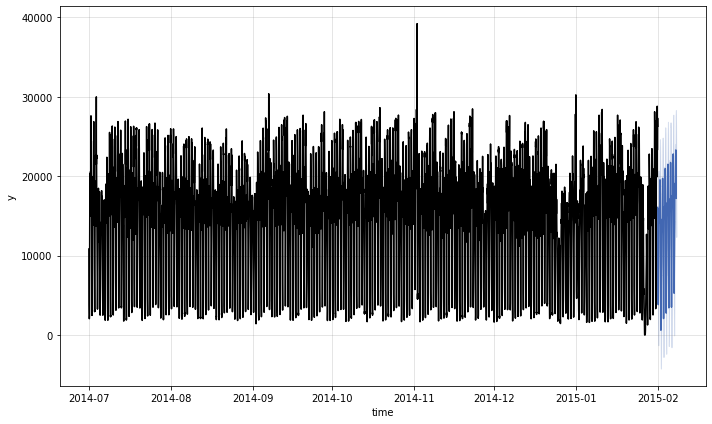

In [39]:
m.plot()